In [66]:
import sys
import os

sys.path.append('..')

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Questão 1**

## **Dados**

In [68]:
data = pd.read_csv('../data/mnist_5.csv', header=None).values
data.shape

(6313, 784)

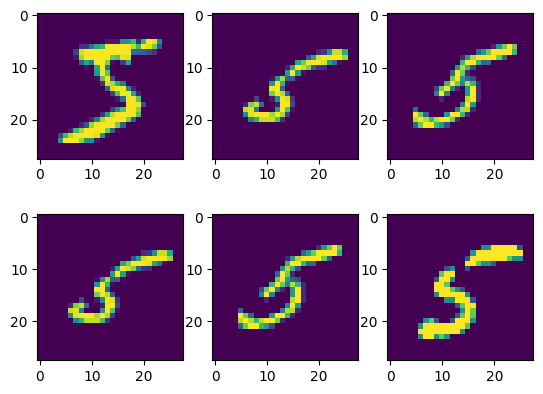

In [69]:
fig, axs = plt.subplots(2, 3)

for i in range(2):
    for j in range(3):
        example = data[i+j].reshape(28, 28)
        axs[i][j].imshow(example)

## **Modelo**

In [70]:
from amaprob.models.probabilistic_pca import PPCA

In [71]:
def plot_sample(m, ax):
    sample = m.sample()
    sample = sample.reshape(28, 28)
    ax.imshow(sample)

In [72]:
def get_reconstruction(m, d):
    ld = m.project(d)
    rd = m.reconstruct(ld)
    return rd

In [73]:
model = PPCA(data, 2)
model.fit()

### **Reconstrução e Geração**

In [74]:
latent_dims = [2, 10, 20]

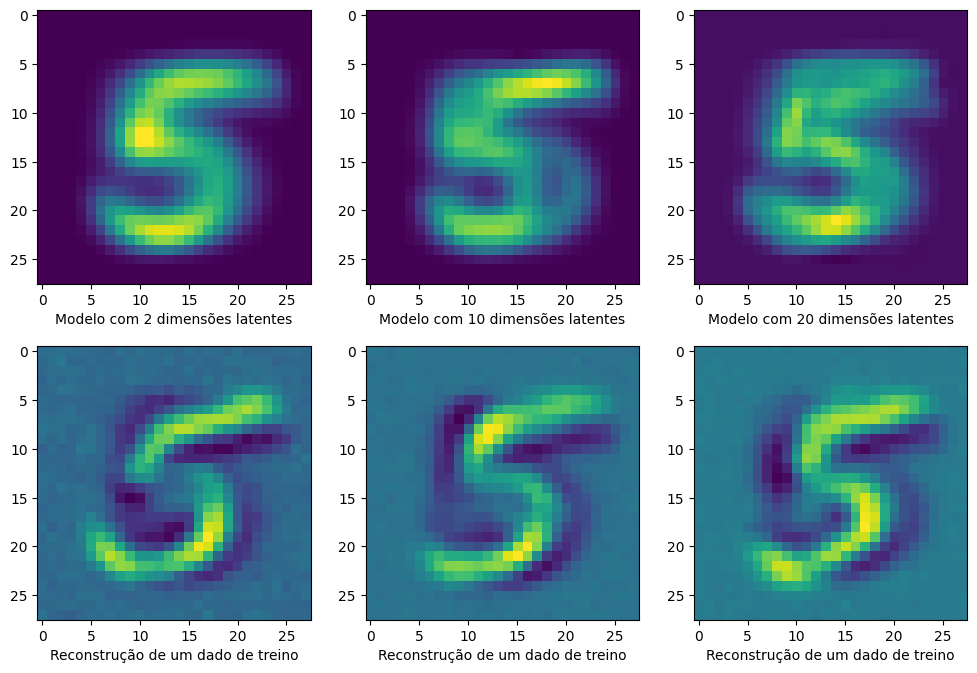

In [75]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(len(latent_dims)):
    model = PPCA(data, latent_dims[i])
    model.fit()
    plot_sample(model, axs[0][i])
    axs[0][i].set_xlabel(f'Modelo com {latent_dims[i]} dimensões latentes')
    reconstruction = get_reconstruction(model, data[0]).reshape(28, 28)
    axs[1][i].imshow(reconstruction)
    axs[1][i].set_xlabel('Reconstrução de um dado de treino')

Text(0.5, 1.0, 'Dado original antes da reconstrução')

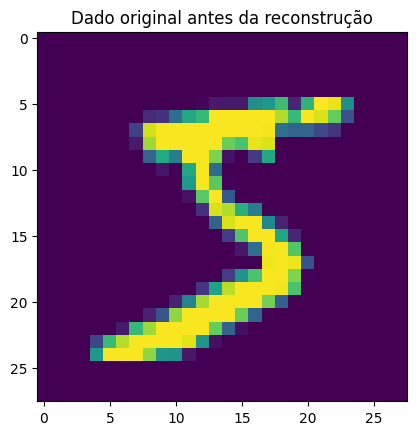

In [76]:
plt.imshow(data[0].reshape(28, 28))
plt.title('Dado original antes da reconstrução')

# **Questão 2**

In [77]:
from amaprob.models.gaussian_vi import GaussianVariationalInference

In [78]:
data = pd.read_csv('../data/gaussian_1d.csv', header=None).values.reshape(1, -1)

In [79]:
from scipy.stats import norm
def plot_hist_dist(m, ax):
    rng = np.arange(0, 4, 0.01)
    n = norm.pdf(rng, m.m, 1/m.t)

    counts, bins = np.histogram(data)
    ax.hist(bins[:-1], bins, weights=counts)
    ax.plot(rng, 100*n, color='orange')
    ax.set_title('Histograma dos dados x Distribuição encontrada')
    ax.set_xlabel(f'mu = {m.m}, tau = {m.t}')

In [80]:
points = [10, 50, 100, 500]

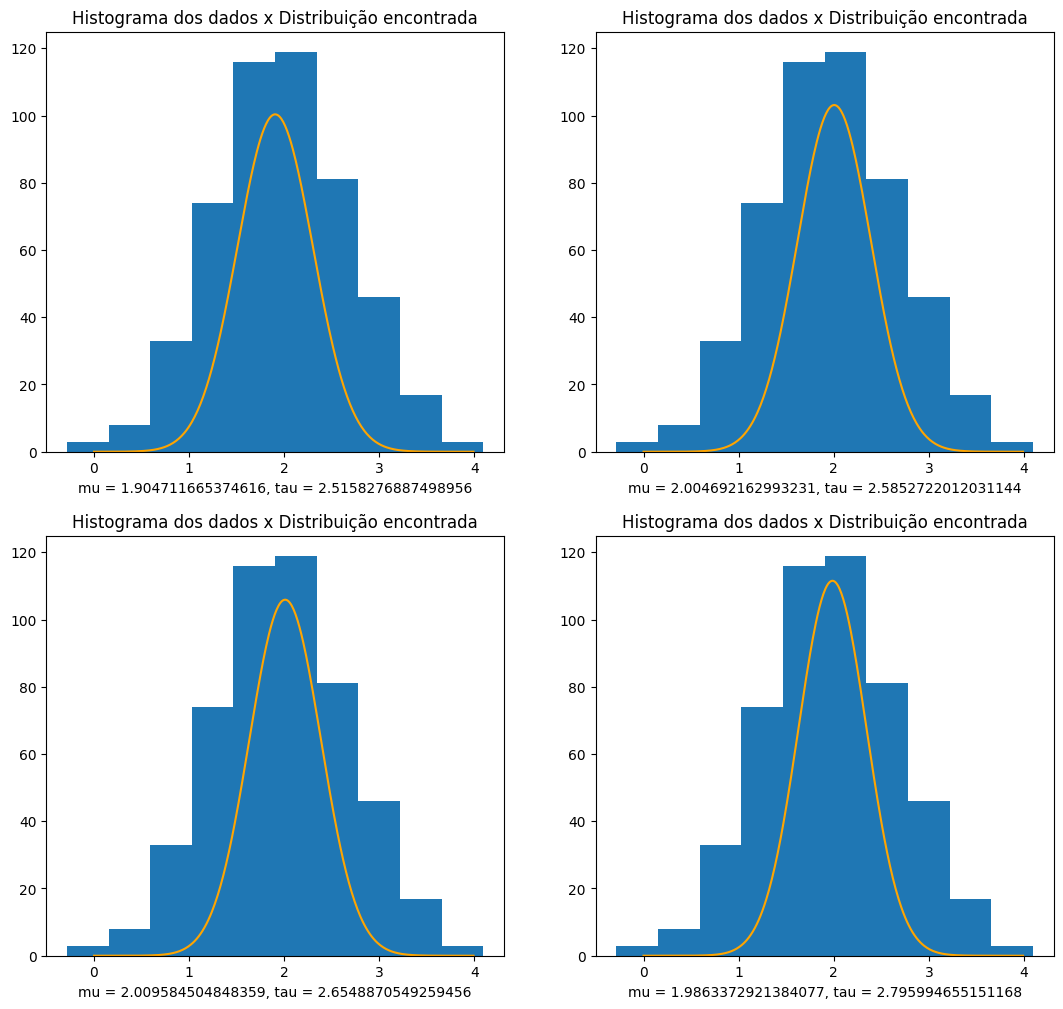

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(13, 12))

idx = 0
for i in range(2):
    for j in range(2):
        model = GaussianVariationalInference(2, 1, 3, 1)
        model.fit(data[:, :points[idx]])
        plot_hist_dist(model, axs[i][j])
        idx += 1